# Introduction

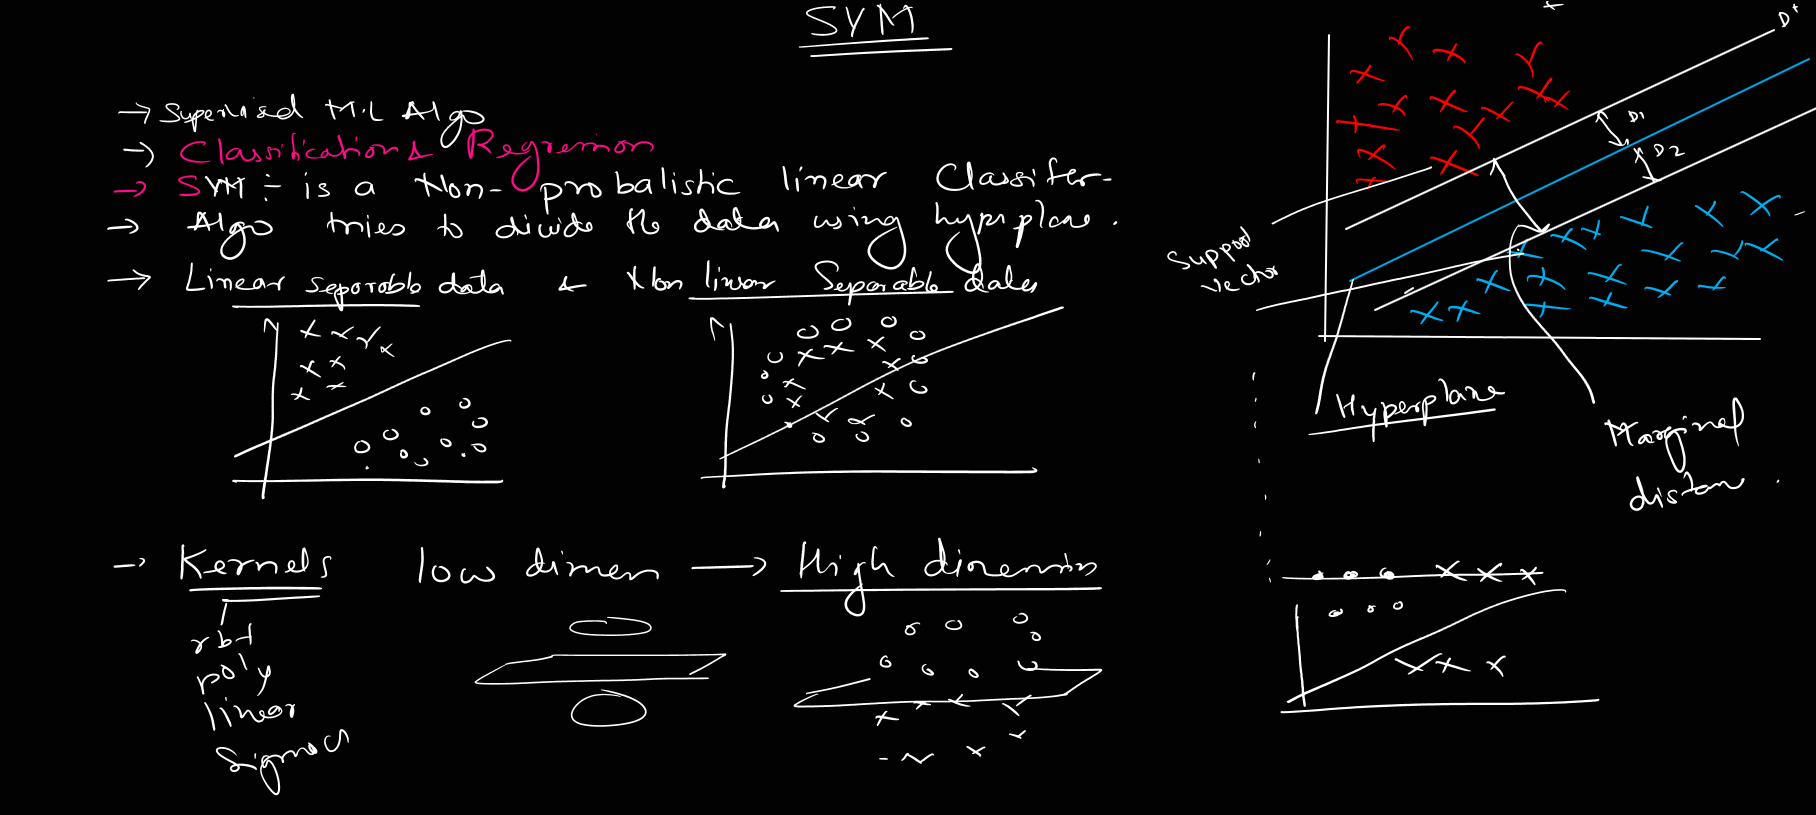

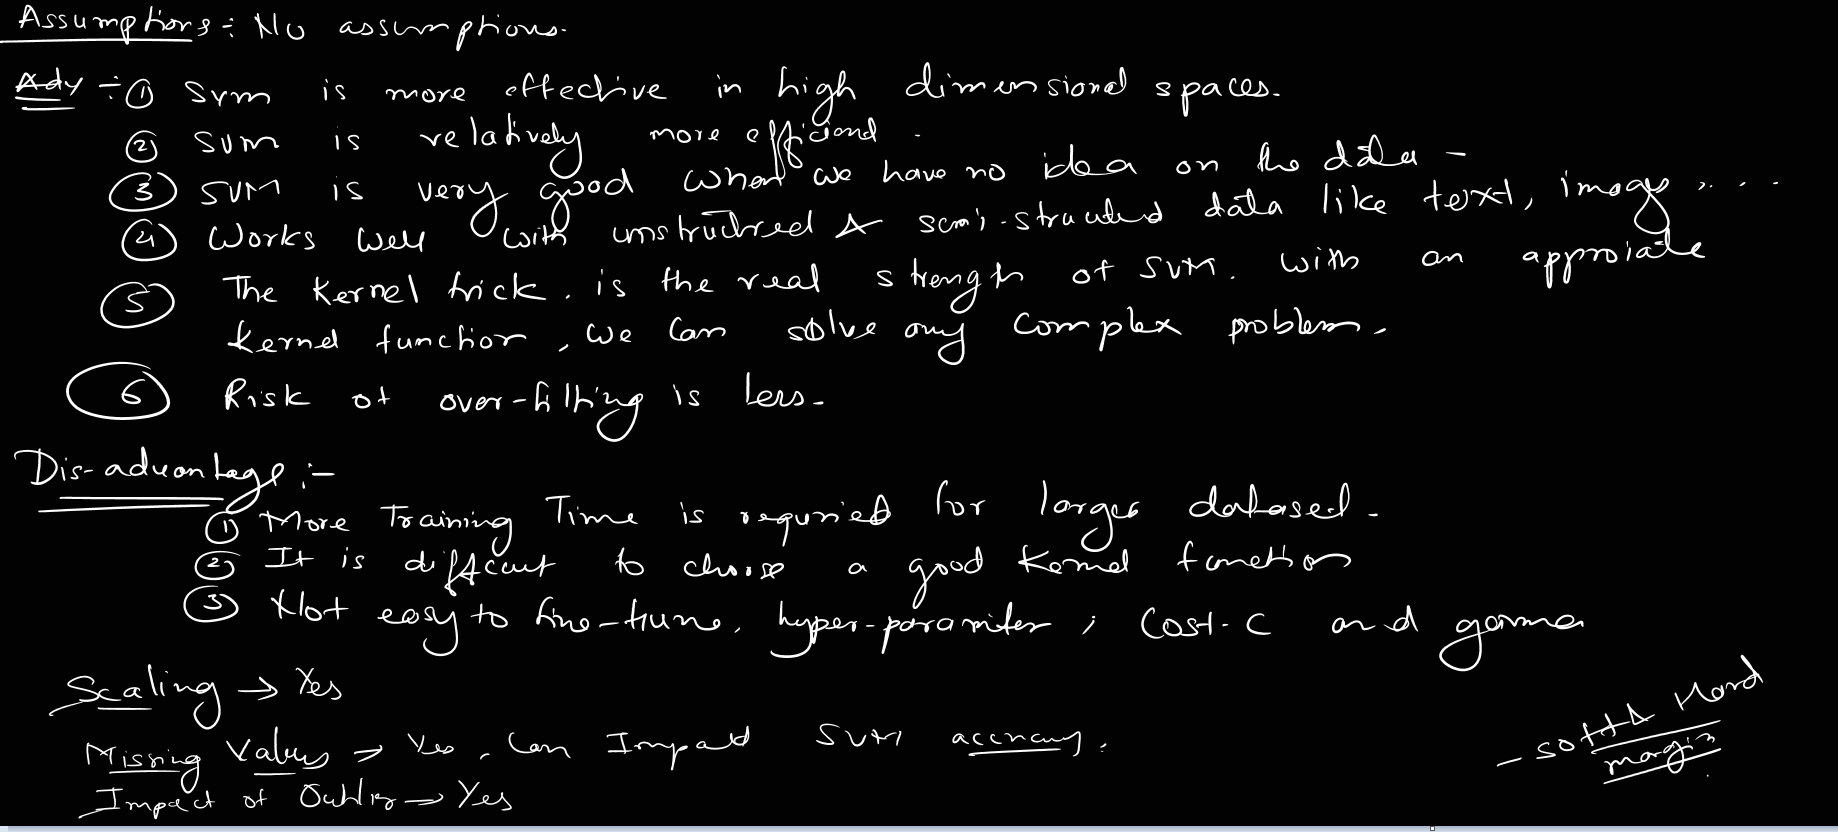

Support Vector Machine is a supervised Machine Learning algorithm widely used for solving different machine learning problems. Given a dataset, the algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.

We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose?
SVM solves this problem using the maximum margin as shown 
<img src='SVM_hyperplane.PNG' width="400">

The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a __hyperplane__ in terms of  SVM. 
A _Hyperplane_ is an n-1 dimensional plane which optimally divides the data of n dimensions. Here, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyperplane is a line here.
The two points (highlighted with circles) which are on the yellow lines, they are called the __support vectors__. As it is a 2-D figure, they are points. In a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the algorithm creates the optimum classification line by maximising its distance from the two support vectors.

When the data is not linearly separable,  then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMs more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods. 
Kernel methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without calculating the new coordinates in that higher dimension. It implicitly uses predefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points.  This is called the kernel trick.



n.


## Python Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As the data consists of values which differ a lot in magnitude, they need to be brought to the same scale. It's done using the standard scalar.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
new_data=scaler.fit_transform(df.drop(labels=['quality'],axis=1))

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [7]:
new_df=pd.DataFrame(data=new_data,columns=columns)

In [8]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


As there are no missing values, we don't need to do data imputation.

In [9]:
x=new_df
y=df['quality']

In [10]:
from  sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=42)

In [11]:
from sklearn.svm import SVC

In [12]:
model=SVC()
model.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
model.predict(test_x)

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 5,

In [20]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(test_y,model.predict(test_x))

0.6003787878787878

As observed, the accuracy of the model is quite low. We need to implement the grid search approach to optimize the parameters to give the best accuracy.

#### Implementing Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [44]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [45]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=nan, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=nan, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=nan, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=nan, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ...................... C=0.1, gamma=0.5, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b


[CV] ......................... C=10, gamma=1, score=nan, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ......................... C=10, gamma=1, score=nan, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ......................... C=10, gamma=1, score=nan, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] ....................... C=10, gamma=0.5, score=nan, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] ....................... C=10, gamma=0.5, score=nan, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] ....................... C=10, gamma=0.5, score=nan, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] ....................... C=10, gamma=0.5, score=nan, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] 

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-

[CV] ..................... C=50, gamma=0.001, score=nan, total=   0.0s
[CV] C=50, gamma=0.001 ...............................................
[CV] ..................... C=50, gamma=0.001, score=nan, total=   0.0s
[CV] C=50, gamma=0.001 ...............................................
[CV] ..................... C=50, gamma=0.001, score=nan, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ........................ C=100, gamma=1, score=nan, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ........................ C=100, gamma=1, score=nan, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ........................ C=100, gamma=1, score=nan, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ........................ C=100, gamma=1, score=nan, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-

ValueError: Unknown label type: 'continuous'

In [17]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [18]:
model_new=SVC(C=10, gamma=1)
model_new.fit(train_x,train_y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
accuracy_score(test_y,model_new.predict(test_x))

0.6268939393939394

## Support Vector Regression

Let’s talk about Linear Regression first. How to determine the best fit line? The idea is to create a line which minimises the total residual error. The SVR approach is a bit different. Instead of trying to minimise the error, SVR focuses on keeping the error in a fixed range. This approach can be explained using three lines. The first line is the best fit regressor line, and the other two lines are the bordering ones which denote the range of error.
<img src="SVR.PNG" width="500">

What does this mean? It means that we are going to consider the points inside this ± error boundary only for preparing our model. In other words, the best fit line(or the hyperplane) will be the line which goes through the maximum number of data points and the error boundaries are chosen to ensure maximum inclusion. This error term can be customized  using the '_epsilon_' parameter defined for the scikit-learn SVR implementation.  

## Python Implementation

In [22]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [23]:
df= pd.read_csv('Admission_Prediction.csv')

In [24]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [25]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

As we can see, there are some column with missing values. we need to impute those missing values.

In [26]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [27]:
# seeing that after imputation no column has missing values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [28]:
x=df.drop(['Chance of Admit','Serial No.'],axis=1)
y=df['Chance of Admit']
columns=x.columns

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=33)

In [31]:
from sklearn.svm import SVR
svr= SVR(C=10)

In [32]:
svr.fit(train_x, train_y)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
from sklearn.metrics import r2_score
score= r2_score(test_y,svr.predict(test_x))
score

0.7340987165302327

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001] }
grid= GridSearchCV(SVR(),param_grid, verbose=3)

In [35]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.092, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.126, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.079, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.089, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.054, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] .................... C=0.1, gamma=0.5, score=0.232, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.571, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.626, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.635, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.346, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.399, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.698, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.723, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [36]:
grid.best_estimator_

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
svr_new=SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
svr_new.fit(train_x, train_y)

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
score_new= r2_score(test_y,svr_new.predict(test_x))
score_new

0.7457021772643664

In [58]:
# saving the model to the local file system
"""from joblib import dump, load
filename = 'test1.joblib'
dump(svr_new, filename) """
filename = 'finalized_model.pickle'
pickle.dump(svr_new, open(filename, 'wb'))

['test1.joblib']

Now this saved model file will be used for prediction. We'll create a Flask app for the same and deploy it to AWS.

In [179]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9514405802107618
